In [52]:
# Import json
import json
import requests
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import pytz
from MCForecastTools import MCSimulation
%matplotlib inline

In [53]:
# Load environment variables 
load_dotenv()

True

In [54]:
# Fetch Bitcoin url
url_btc = 'https://api.alternative.me/v1/ticker/bitcoin/'
url_btc

'https://api.alternative.me/v1/ticker/bitcoin/'

In [55]:
# Fetch Eth url
url_eth = 'https://api.alternative.me/v1/ticker/ethereum/'
url_eth

'https://api.alternative.me/v1/ticker/ethereum/'

In [56]:
# Add format specifier to request url
url_btc = url_btc + "?format-json" 
url_eth = url_eth + "?format-json" 

In [57]:
# Exicute GET request & Index JSON
my_btc = requests.get(url_btc).json()[0]['price_usd']
my_btc

'56469.0000000000000000'

In [58]:
# Exicute GET requests & Index JSON
my_eth = requests.get(url_eth).json()[0]['price_usd']
my_eth

'4508.4600000000000000'

In [59]:
# Print current Bitcoin wallet balance
print(f"The current value of your BTC is ${my_btc}")

The current value of your BTC is $56469.0000000000000000


In [60]:
# Print current Ethereum wallet balance
print(f"The current value of your ETH is ${my_eth}")

The current value of your ETH is $4508.4600000000000000


In [61]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [62]:
# Set Alpaca API key and secret
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [63]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

start_date = pd.Timestamp("2015-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

tickers = ["AGG", "SPY"]

df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

In [64]:
df_ticker.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2016-05-11 00:00:00-04:00  111.06  111.26  111.02  111.09  2335411.0     NaN   
2016-05-12 00:00:00-04:00  110.92  111.10  110.92  111.00  1392244.0  207.29   
2016-05-13 00:00:00-04:00  111.08  111.23  111.03  111.19  1342222.0  206.21   
2016-05-16 00:00:00-04:00  111.19  111.19  110.98  111.00  2983296.0  204.96   
2016-05-17 00:00:00-04:00  111.03  111.05  110.87  110.87  1603040.0  206.46   

                                                                 
                               high     low   close      volume  
time                                                             
2016-05-11 00:00:00-04:00       NaN     NaN     NaN         NaN  
2016-05-12 00:00:00-04:00  207.4899  205.37  206.56  74951582.0  
2016-05-13 00:00:00-04:00  206.8600  204.38  204.76  79114901.0  
2016-05-16 00:00:00-04:00  207.3400  204.89  206.78  60903170.0  
2016-05-17 00:00:00-04:00  206.8000  204.23  204.88  93793897.0

### Simulate five year portfolio growth with evenly-distributed stock investments

In [72]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.5,.5],
    num_simulation = 1000,
    num_trading_days = 252*30)
MC_even_dist.portfolio_data.tail()

AGG                                          \
                             open      high       low   close      volume   
time                                                                        
2020-04-27 00:00:00-04:00  117.21  117.3600  116.8200  116.84   6707494.0   
2020-04-28 00:00:00-04:00  117.27  117.4500  117.1200  117.25  10729690.0   
2020-04-29 00:00:00-04:00  117.29  117.4800  117.2000  117.43   9036494.0   
2020-04-30 00:00:00-04:00  117.38  117.4900  117.0650  117.15  13756340.0   
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.90  11778582.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-04-27 00:00:00-04:00    -0.004346  285.12  288.2700  284.62  287.11   
2020-04-28 00:00:00-04:00     0.003509  291.02  291.4000  285.40  285.77   
2020-04-29 00:00:00-04:00     0.001535  291.53  294.8800  290.41  293.19   
2020-04-30 00:00:00-04:00    -0.002384  291.71  293.3239  288.59  290.39   
2020-05-01 00:00:00-04:00    -0.002134  285.31  290.6572  281.52  282.73   

                                                     
                                volume daily_return  
time                                                 
2020-04-27 00:00:00-04:00   67454166.0     0.014380  
2020-04-28 00:00:00-04:00   95561389.0    -0.004667  
2020-04-29 00:00:00-04:00  102013837.0     0.025965  
2020-04-30 00:00:00-04:00  101677550.0    -0.009550  
2020-05-01 00:00:00-04:00  111321036.0    -0.026378

In [73]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001555,0.996310,1.003005,1.002947,1.008401,1.005826,1.004185,1.008066,0.989857,1.005836,...,0.997782,1.002463,0.998383,0.990128,0.995970,0.992550,0.993649,1.001182,0.994197,0.996538
2,0.996960,0.987969,1.021376,0.997673,1.003699,0.995770,1.011819,0.996962,0.980234,1.015706,...,0.997369,0.998339,0.988024,0.992973,1.001056,0.995760,1.006797,0.992153,0.992655,0.994563
3,1.003471,0.992605,1.025794,1.004799,1.003723,0.991515,1.004306,0.990683,0.983105,1.027455,...,0.987132,1.003428,0.987776,0.998603,0.998277,0.987287,1.011455,0.997975,0.998509,0.984884
4,1.012154,0.979807,1.022370,0.998222,0.995847,0.983914,0.996826,0.981505,0.986327,1.030618,...,0.978598,1.014390,0.990237,0.993421,1.001613,0.988999,1.018857,1.009386,1.001323,0.996046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.804985,5.741355,1.645238,11.091676,3.201206,2.310678,4.134443,3.669357,2.710472,3.742470,...,3.487776,8.069898,1.557253,1.763955,4.248073,2.374943,11.447472,2.346145,2.658784,4.792152
7557,3.822177,5.678548,1.660632,11.109849,3.187655,2.303384,4.088364,3.672802,2.718995,3.764217,...,3.480993,8.064762,1.563913,1.751401,4.278810,2.336925,11.425579,2.357774,2.655806,4.768277
7558,3.810511,5.683522,1.669755,11.057433,3.160493,2.296708,4.087376,3.695062,2.723999,3.699058,...,3.476660,8.030017,1.569737,1.753771,4.251858,2.341546,11.451165,2.382186,2.623229,4.769237
7559,3.870844,5.686972,1.673446,10.937491,3.138496,2.289784,4.087526,3.669913,2.753972,3.692389,...,3.455526,7.911288,1.557074,1.761981,4.236546,2.353300,11.467632,2.397961,2.617378,4.799606


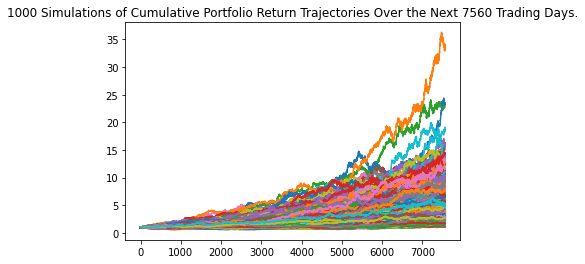

In [74]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

In [69]:
even_tbl

count           1000.000000
mean               1.320352
std                0.295993
min                0.491431
25%                1.111864
50%                1.289663
75%                1.491432
max                2.473785
95% CI Lower       0.817228
95% CI Upper       1.977843
Name: 1260, dtype: float64

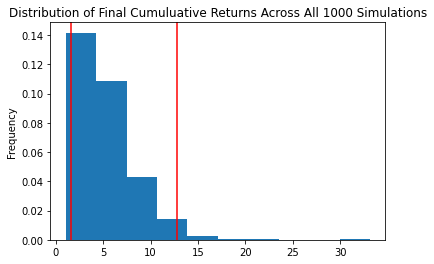

In [75]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()